In [270]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import  RegexpTokenizer
from sklearn.preprocessing import LabelEncoder


# Loading Data

In [271]:
data = pd.read_csv("spam.csv")

In [272]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [273]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [274]:
data.shape

(5572, 2)

# Encoding Category to Numerical Value

In [70]:
le = LabelEncoder()
data["Category"] = le.fit_transform(data['Category'])
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [228]:
X = data["Message"]
X.shape


(5572,)

In [229]:
y = data["Category"]
y.shape


(5572,)

# Data Pre-processing

In [230]:
#tokenization of the sentences

tokenizer = RegexpTokenizer(r'\w+')
X = X.apply(lambda X:tokenizer.tokenize(X.lower()))
X.head()

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Message, dtype: object

In [231]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [232]:
def word_lemm(text):
    lem_word = [ lemmatizer.lemmatize(i) for i in text]
    return lem_word


In [233]:
# lemmatizing the sentences

X = X.apply(lambda X: word_lemm(X))
X.head(10)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, go, to, usf, he, l...
5    [freemsg, hey, there, darling, it, s, been, 3,...
6    [even, my, brother, is, not, like, to, speak, ...
7    [a, per, your, request, melle, melle, oru, min...
8    [winner, a, a, valued, network, customer, you,...
9    [had, your, mobile, 11, month, or, more, u, r,...
Name: Message, dtype: object

In [234]:
def word_stem(text):
    stem_word = " ".join([stemmer.stem(i) for i in text])
    return stem_word


In [235]:
# stemming the sentences

X = X.apply(lambda X: word_stem(X))
X.head(10)

0    go until jurong point crazi avail onli in bugi...
1                                ok lar joke wif u oni
2    free entri in 2 a wkli comp to win fa cup fina...
3          u dun say so earli hor u c alreadi then say
4    nah i don t think he go to usf he life around ...
5    freemsg hey there darl it s been 3 week s now ...
6    even my brother is not like to speak with me t...
7    a per your request mell mell oru minnaminungin...
8    winner a a valu network custom you have been s...
9    had your mobil 11 month or more u r entitl to ...
Name: Message, dtype: object

# Spliting the data set into test and train

In [236]:
from sklearn.model_selection import train_test_split

In [277]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)


# Feature Extraction

In [238]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=3000)
X_train = count_vect.fit_transform(X_train).toarray()
X_test = count_vect.fit_transform(X_test).toarray()

In [239]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.fit_transform(X_test)


# Training and testing the model using Naive Bayes

In [244]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [245]:
predicted = clf.predict(X_test)

In [248]:
prediction = clf.score(X_test, y_test) * 100
prediction

80.62780269058297

# Confusion Matrix

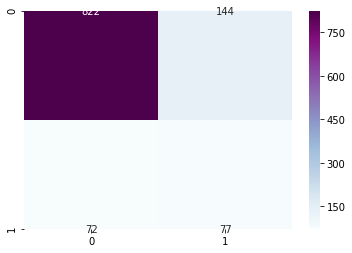

In [276]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')


# Training and testing the model using RandomForest

In [275]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42).fit(X_train,y_train)
y_pred=rfc.predict(X_test)
score = rfc.score(X_test, y_test) * 100
score

/home/jeevanc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


86.45739910313901

# Confusion Matrix

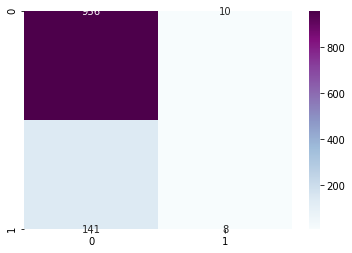

In [265]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')